In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as la

In [2]:
def sghmc( U, gradU, ini, C, V, samples, steps=50, epsilon=0.1, seed = 663):
    
    np.random.seed(seed)
    B = 0.5*V*epsilon
    C = np.asarray(C)
    V =  np.asarray(V)
    n_params = ini.shape[0]
    
    if n_params ==1:
        D = np.sqrt(2*(C-B)*epsilon)
    else:
        D =la.cholesky(2*(C-B)*epsilon) 
    
    samples2 = np.zeros((samples, n_params))
    samples2[0] = ini
    
    for i in range(samples-1):
        x = samples2[i]
        p = np.random.randn(n_params)
        for j in range(steps):
            x = x + epsilon * p
            p = p - epsilon * gradU(x) - epsilon * np.dot(C,p) - np.dot(D,np.random.randn(n_params))
        samples2[i+1] = x
    
    return samples2

In [6]:
S = np.array([[1, 0.9], [0.9, 1]])
S_inv = la.inv(S)
U = lambda x: 0.5 * x.T @ S_inv @ x
gradU = lambda x: S_inv @ x + np.random.randn(2)

ini = np.array([0,0])
C = 1*np.eye(2)
V = np.eye(2)
xs = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))[0]
ys = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))[1]

samples = sghmc(U, gradU, ini, C, V=np.eye(2), samples=50, steps=50, epsilon=0.1, seed = 663)

def probmap(x,y):
    return (np.exp(-0.5 * (S_inv[0,0]*x**2 + 2*S_inv[0,1]*x*y + S_inv[1,1]*y**2)))

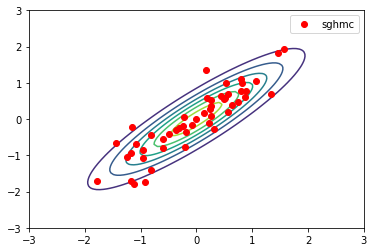

In [11]:
plt.contour(xs, ys, probmap(xs,ys))
plt.plot(samples[:,0], samples[:,1], 'ro', label='sghmc')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.savefig("figure3.png")